<a href="https://colab.research.google.com/github/Jeremy26/neural_optimization_course/blob/main/Mini_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Quantization Workshop

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fp32_values = np.sort(np.random.uniform(low = 0.0, high=5.0, size= (10)))
fp32_max = np.max(fp32_values)
fp32_min = np.min(fp32_values)

# corresponds to uint8 limits
q_min = 0 
q_max = 255

# formula for finding scale and zero point for mapping fp32 -> uint8
scale = (fp32_max - fp32_min) / (q_max - q_min)
numerator = (fp32_max * q_min - fp32_min * q_max)
denominator = (fp32_max - fp32_min)
zero_point = np.uint8(numerator / denominator)

# finding corresponding quantized values
q_values = (fp32_values / scale).astype(np.uint8) + np.uint8(zero_point)

In [3]:
print(zero_point)
print(q_values)
print(scale)

235
[  0  14  96 111 183 187 195 198 235 255]
0.017439099877436255


In [4]:
fp32_text = [str(round(x,2)) for x in fp32_values.tolist()]
int8_text = [str(round(x,2)) for x in q_values.tolist()]

print(fp32_text)
print(int8_text)

['0.37', '0.61', '2.06', '2.31', '3.57', '3.63', '3.78', '3.83', '4.47', '4.82']
['0', '14', '96', '111', '183', '187', '195', '198', '235', '255']


In [5]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=np.arange(len(fp32_values)), y=fp32_values, text = fp32_text,
                    mode='markers+text', textposition="top left",
                    name='fp32_values'), row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(q_values)), y=q_values, text = int8_text,
                    mode='markers+text', textposition="bottom right",
                    name='Quantized values'), row=1, col=2)

fig.update_layout(height=500, width=1000, title_text="Quantization - fp32 -> int8 mapping")
fig.show()

In [6]:
fig.write_html("quantization_mapping.html")

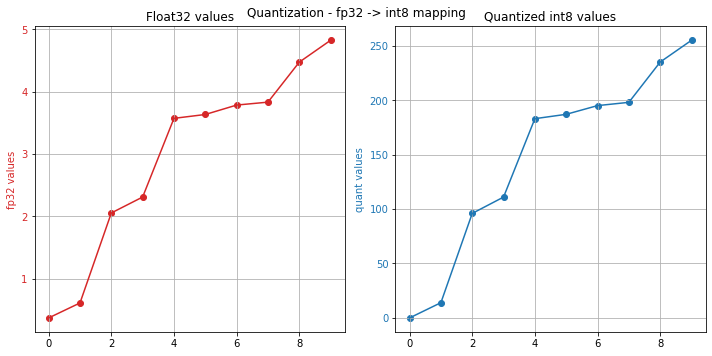

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1_color = 'tab:red'
ax1.set_ylabel('fp32 values', color=ax1_color)
ax1.plot(range(len(fp32_values)), fp32_values, color=ax1_color)
ax1.scatter(range(len(fp32_values)), fp32_values, color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.set_title('Float32 values')
ax1.grid(True)

ax2_color = 'tab:blue'    
ax2.set_ylabel('quant values', color=ax2_color)
ax2.plot(range(len(q_values)), q_values, color=ax2_color)
ax2.scatter(range(len(q_values)), q_values, color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.set_title('Quantized int8 values')
ax2.grid(True)

plt.suptitle('Quantization - fp32 -> int8 mapping')
fig.tight_layout()
plt.show()